This is a notebook on how to use deeplabcut (DLC) to track pupil

Let's import `pupil` first

In [2]:
%matplotlib inline
from pipeline import pupil
import datajoint as dj

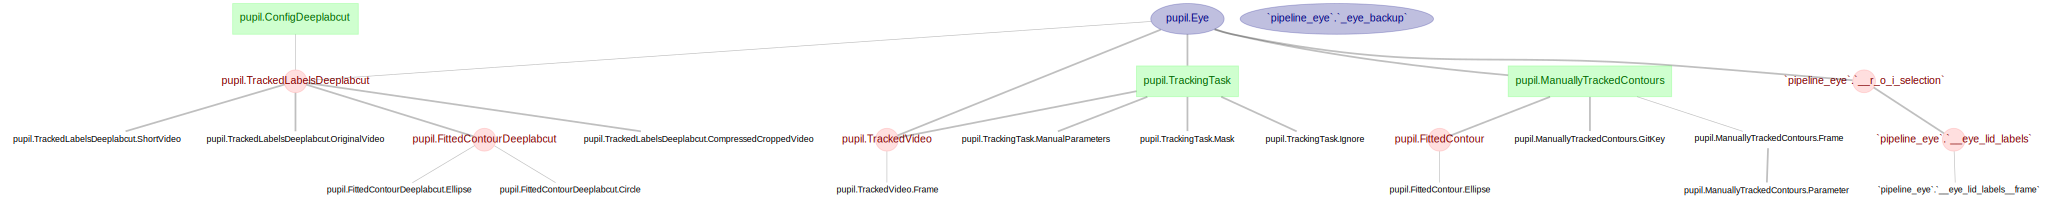

In [3]:
dj.ERD(pupil)

# Tracking the pupil

In order to track the pupil automatically via DLC, simply call `pupil.TrackedLabelsDeeplabcut().populate(key)` where key is a dictionary with `animal_id`, `session`, and `scan_idx`

In [7]:
key = dict(animal_id=20892, session=10, scan_idx=10) # modify the values
# pupil.TrackedLabelsDeeplabcut().populate(key)

Once called, then you will see whole bunch of print statements including:

1. Making a short video! followed by Successfully created a short video!
2. Starting to analyze %  ..._short.avi
3. Making a compressed and cropped video! followed by Successfully created a compressed & cropped video!
4. Starting to analyze %  ..._compressed_cropped.avi

When calling `populate`, it first makes a short video, then DLC predicts on the short video. Then, using the labels predicted on the short video, it finds cropping coordinates to obtain a bounding box around pupil area. Using the cropping coords found from the previous step, it creates a compressed and cropped video of the original video, and DLC finally predicts on the compressed and cropped video. One can actually find information on `OriginalVideo`, `ShortVideo`, and `CompressedCroppedVideo` videos

In [10]:
pupil.ConfigDeeplabcut()

config_path path to deeplabcut config,shuffle shuffle number used for the trained dlc model. Needed for dlc.analyze_videos,trainingsetindex trainingset index used for the trained dlc. model. Needed for dlc.analyze_videos
/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,1,0


In [4]:
pupil.TrackedLabelsDeeplabcut.OriginalVideo()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,config_path path to deeplabcut config,original_width original video width size,original_height original video height size,video_path path to original video
20892,9,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,664,672,/mnt/scratch06/Two-Photon/taliah/2019-02-07_12-31-03/20892_9_00010_beh_tracking/20892_9_00010_beh.avi
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,904,850,/mnt/scratch06/Two-Photon/taliah/2019-02-12_12-40-37/20892_10_00010_beh_tracking/20892_10_00010_beh.avi


In [5]:
pupil.TrackedLabelsDeeplabcut.ShortVideo()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,config_path path to deeplabcut config,starting_frame middle frame of the original video,video_path path to short video
20892,9,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,61769,/mnt/scratch06/Two-Photon/taliah/2019-02-07_12-31-03/20892_9_00010_beh_tracking/short/20892_9_00010_beh_short.avi
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,69262,/mnt/scratch06/Two-Photon/taliah/2019-02-12_12-40-37/20892_10_00010_beh_tracking/short/20892_10_00010_beh_short.avi


In [6]:
pupil.TrackedLabelsDeeplabcut.CompressedCroppedVideo()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,config_path path to deeplabcut config,cropped_x0 start width coord wrt original video,cropped_x1 end width coord wrt original video,cropped_y0 start height coord wrt original video,cropped_y1 end height coord wrt original video,added_pixels number of pixels added around the cropping coords,video_path path to comparessed & cropped video
20892,9,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,330,664,329,672,100,/mnt/scratch06/Two-Photon/taliah/2019-02-07_12-31-03/20892_9_00010_beh_tracking/compressed_cropped/20892_9_00010_beh_compressed_cropped.avi
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,433,807,548,842,100,/mnt/scratch06/Two-Photon/taliah/2019-02-12_12-40-37/20892_10_00010_beh_tracking/compressed_cropped/20892_10_00010_beh_compressed_cropped.avi


For detailed information, please refer to `DLC_workflow_detailed_explanation.ipynb`

# Fitting contour to the tracked video

Once tracked, then we can fit contour to the tracked video

In [ ]:
# pupil.FittedContourDeeplabcut().populate(key)

When fitting, both `circle` and `ellipse` are fitted

In [8]:
pupil.FittedContourDeeplabcut.Circle & key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,config_path path to deeplabcut config,frame_id frame id with matlab based 1 indexing,"center center of the circle in (x, y) of image",radius radius of the circle,visible_portion portion of visible pupil area given a fitted circle frame. Please refer DLC_tools.PupilFitting.detect_visible_pupil_area for more details
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,0,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,1,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,2,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,3,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,4,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,5,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,6,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,7,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,8,=BLOB=,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,9,=BLOB=,nan,-3.0


In [9]:
pupil.FittedContourDeeplabcut.Ellipse & key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,config_path path to deeplabcut config,frame_id frame id with matlab based 1 indexing,"center center of the ellipse in (x, y) of image",major_radius major radius of the ellipse,minor_radius minor radius of the ellipse,rotation_angle ellipse rotation angle in degrees w.r.t. major_radius,visible_portion portion of visible pupil area given a fitted ellipse frame. Please refer DLC_tools.PupilFitting.detect_visible_pupil_area for more details
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,0,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,1,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,2,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,3,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,4,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,5,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,6,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,7,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,8,=BLOB=,nan,nan,nan,-3.0
20892,10,10,/mnt/scratch07/donnie/DeepLabCut/pupil_track-Donnie-2019-02-12/config.yaml,9,=BLOB=,nan,nan,nan,-3.0


# Retreiving fitted info

In [20]:
r, center_circle = (pupil.FittedContourDeeplabcut.Circle() & key).fetch('radius', 'center', order_by='frame_id ASC')

In [21]:
major_r, minor_r, center_ellipse = (pupil.FittedContourDeeplabcut.Ellipse() & key).fetch('major_radius', 'minor_radius', 'center', order_by='frame_id ASC')

# Checking the fitted frame

If one wants to see how well DLC predicted and how well the fitting proceeded, one can easily check. First, import the following:

In [26]:
from deeplabcut.utils import auxiliaryfunctions
from pipeline.utils import DLC_tools

Specify some **toy case**, then fetch the DLC configuration as well as `CompressedCroppedVideo` information of the **toy case**

In [28]:
toy_case = dict(animal_id=20892, session=10, scan_idx=10)
shuffle, trainingsetindex = (pupil.ConfigDeeplabcut & key).fetch1(
    'shuffle', 'trainingsetindex')
cc_info = (pupil.TrackedLabelsDeeplabcut.CompressedCroppedVideo() & key).fetch1()

config = auxiliaryfunctions.read_config(cc_info['config_path'])
config['config_path'] = cc_info['config_path']
config['shuffle'] = shuffle
config['trainingsetindex'] = trainingsetindex
config['video_path'] = cc_info['video_path']

Now, we instantiate `DLC_tools.PupilFitting`. It takes `config` and `bodyparts` as parameters. If we pass `all` for `bodyparts`, we then plot every label. Otherwise, we can specify a list of bodyparts in `string` format. The available bodyparts are the following:
- 'eyelid_top'
- 'eyelid_top_right'
- 'eyelid_right' 
- 'eyelid_right_bottom'
- 'eyelid_bottom'
- 'eyelid_bottom_left'
- 'eyelid_left'
- 'eyelid_left_top'
- 'pupil_top'
- 'pupil_top_right'
- 'pupil_right'
- 'pupil_right_bottom'
- 'pupil_bottom'
- 'pupil_bottom_left'
- 'pupil_left'
- 'pupil_left_top'

Or you can also see the list by calling `config['bodyparts']`

In [29]:
pupil_fit = DLC_tools.PupilFitting(config=config, bodyparts='all')

138524


Now, we can plot one specific frame with either `circle` fitting or `ellipse` fitting

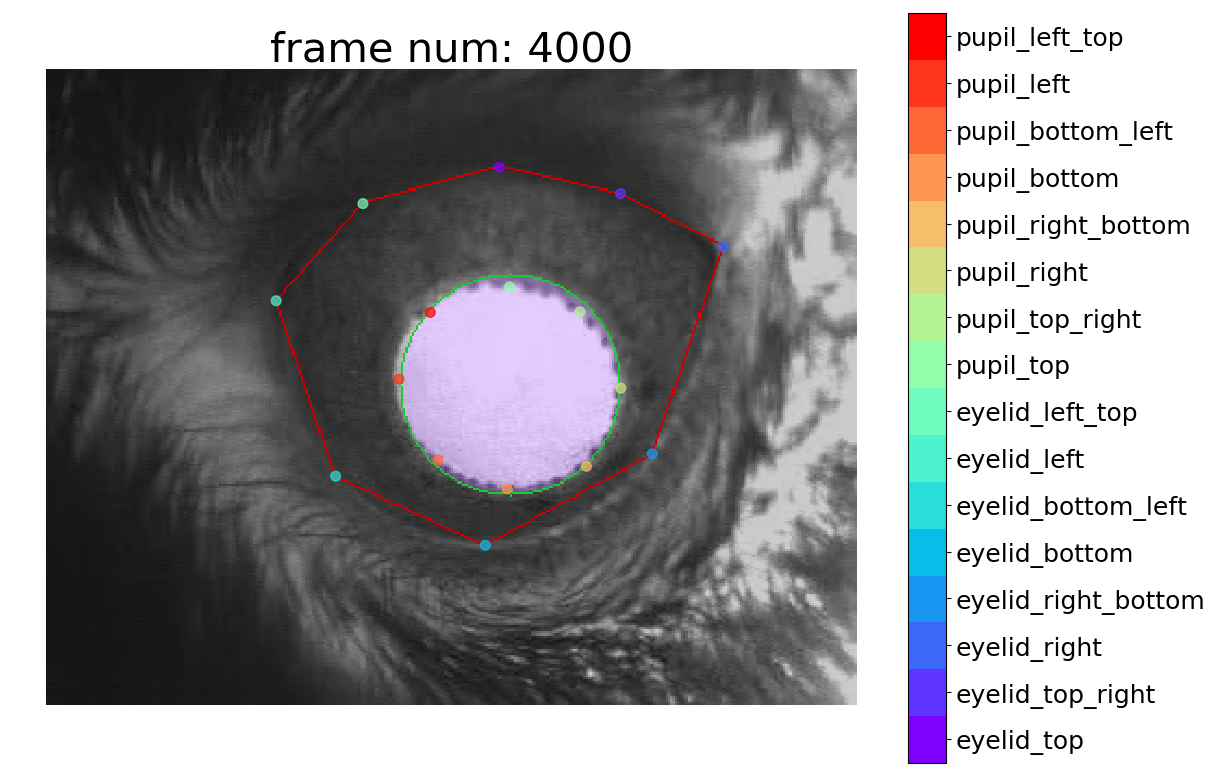

In [39]:
pupil_fit.plot_fitted_frame(frame_num=4000, fitting_method='circle')

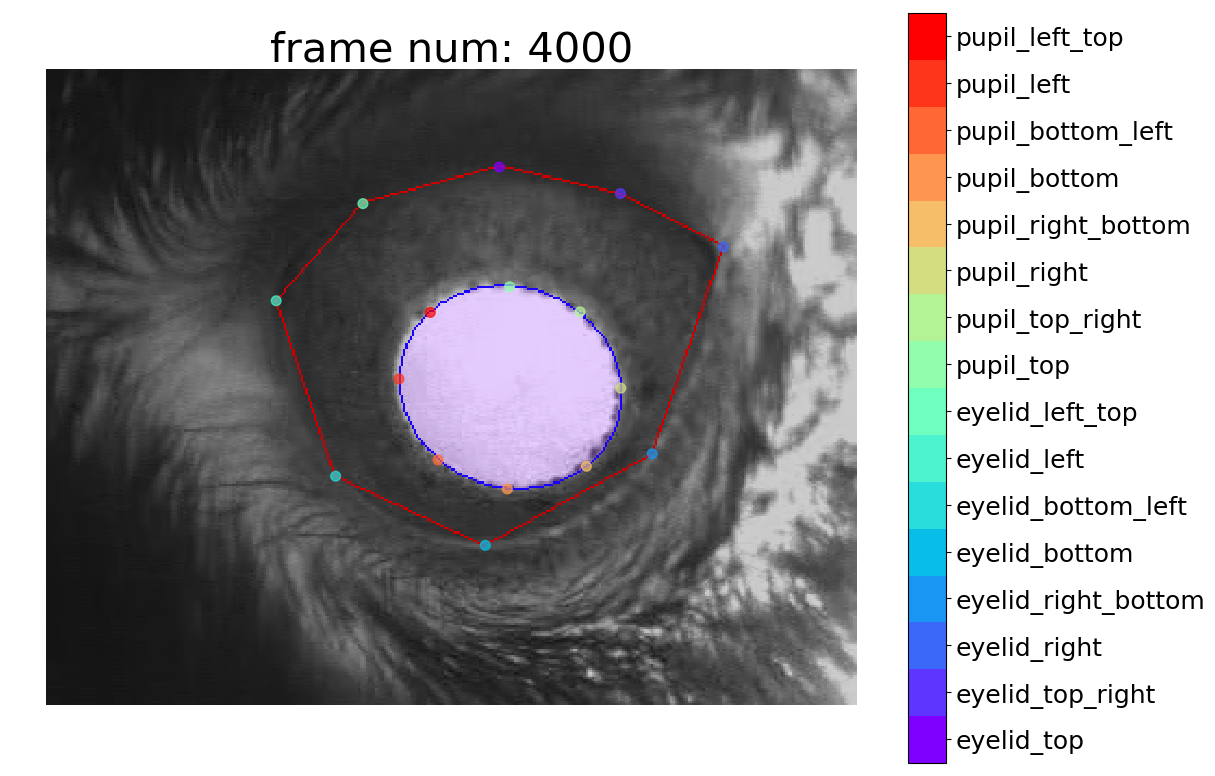

In [40]:
pupil_fit.plot_fitted_frame(frame_num=4000, fitting_method='ellipse')

Or you can plot multiple frames

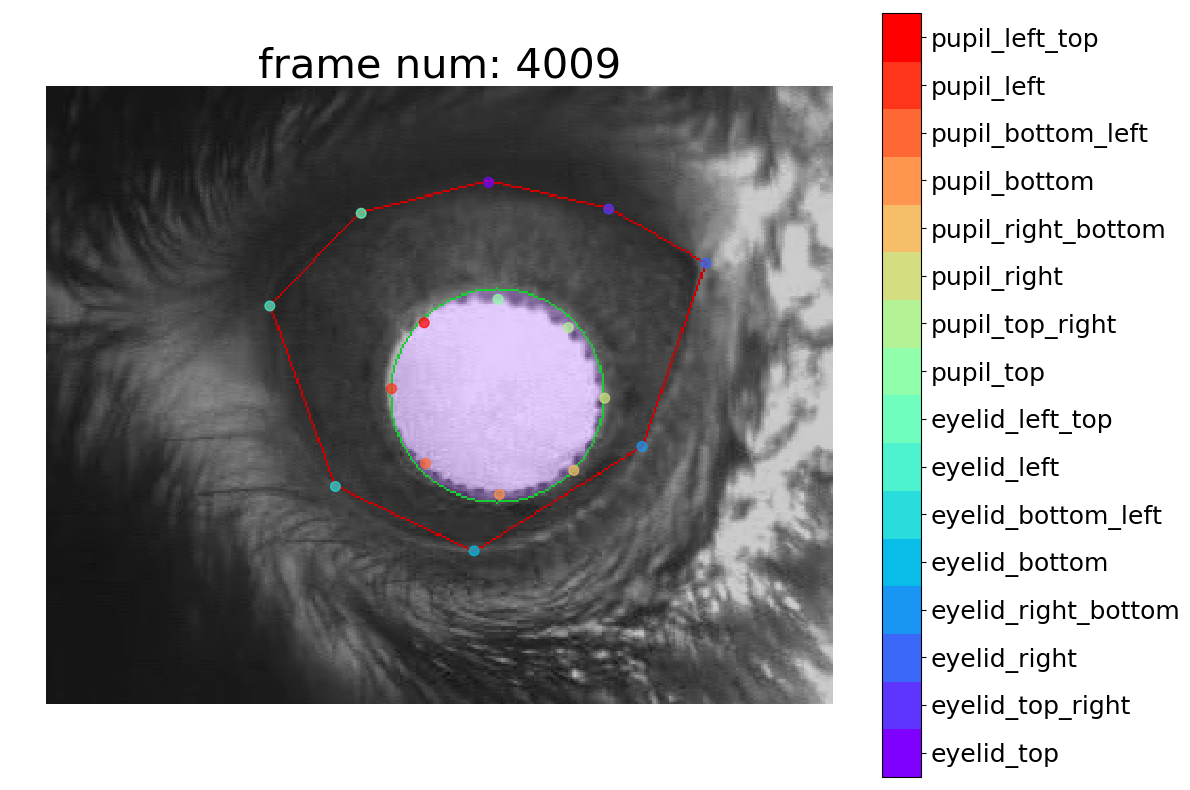

In [42]:
pupil_fit.plot_fitted_multi_frames(start=4000, end=4010, fitting_method='circle')

For more information on `PupilFitting`, please use `DLC_tools.PupilFitting??` and `DLC_tools.PlotBodyparts??`

In [47]:
# DLC_tools.PupilFitting??
# DLC_tools.PlotBodyparts??